<img src="../../thu_sigs_logo.png" alt="清华深研院-横" style="zoom:50%;" />

In [ ]:
#| hide
#| default_exp tree
# pdf:
#   toc: true
#   docx: default

In [ ]:
#|hide
import matplotlib.pyplot as plt

In [ ]:
#|hide
%load_ext autoreload
%autoreload 2
plt.style.use('default')

::: {.callout-important}
本文档具有一定的交互性，建议使用浏览器打开html文件，这样比pdf文件阅读体验更佳。
:::

## 第二题——最大熵模型的深入理解 {#sec-1}

题目如下

> 写出最大熵模型学习的DFP算法



::: {.callout-note}
TL; DR 前面审题内容较长，学习了一些这道题的一些背景知识方便理解。
对于题目的证明，可以直接跳到解题部分@sec-proof。
:::

### 审题

#### 什么是熵？

##### 首先复习一下课件以及李航课本
《决策树》那节课上，我们学习了ID3算法，首次提到了熵的概念，我们来看第一页课件讲了什么：第一页我们就遇到了不少问题，我们稍后解答。我们首先明白了事件有信息量。
多个事件的平均信息量似乎是他们信息量的加和，那课件上说“平均”似乎不妥。
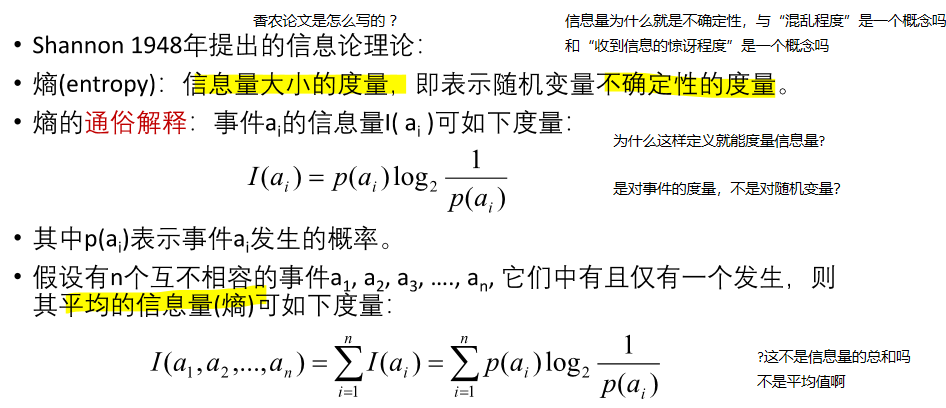
经过我的查询，其实是第一个定义错了，课件上的I(a)就已经是平均信息量了，事件的“信息量”其实是指香农信息量，就是 $-log_2P(a)$，没有多乘一个$P(a)$。
值得注意的是，从课件这一页的公式来看，$I(a_1, a_2) \neq I(a_1 \cup a_2)$，也就是说如果两个事件合并为一个事件的平均信息量和两个事件的平均信息量之和是不一样的。有点让人困惑

在我们学习概率论与数理统计的时候，重要的就是从讨论事件变为讨论随机变量，所以随机变量的信息量也要定义。纠正了刚才第一页课件的错误之后，我们按照第一页的概念来说，随机变量的信息量就是随机变量所有取值事件各自平均信息量的加和，或者是说各个取值事件的信息量在随机变量分布下的期望。
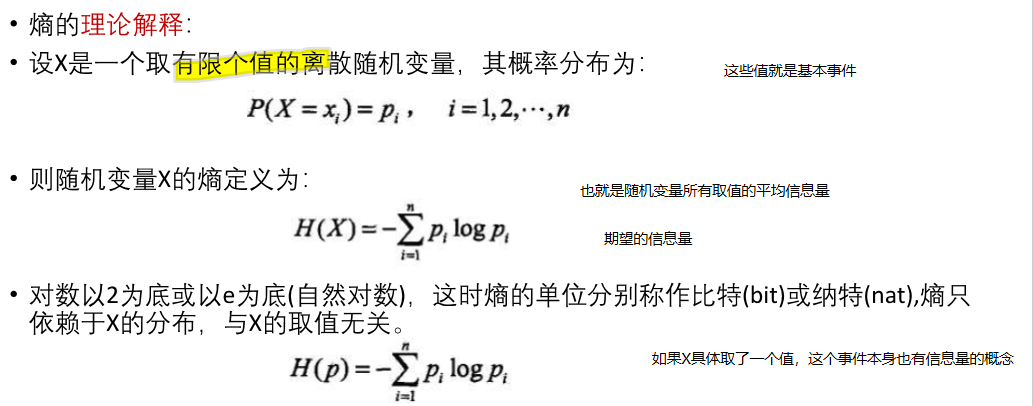
第二页中让我们疑惑的是，熵和信息量这两个概念为什么可以混用？如果可以混用为什么上一页叫做信息量，这一页叫做熵？简单理解一下，目前我们认为信息量 (Information Content)是对一个随机变量取值去定义，熵 (Entropy) 是对随机变量去定义，熵就是信息量在这个随机变量下的期望。注意，一个随机变量取值可能实际上对应了很多个事件，我们刚才说$I(a_1, a_2) \neq I(a_1 \cup a_2)$，随机变量这个变量被人定义后，就定义了一种对信息的理解方式，不同的理解方式下我们认为的信息量是不同的。

这一页是在讲熵(Entropy)和不确定性(Uncertainty)之间的关系。随机变量的不确定性通常是指其结果的不可预测性，即在进行观测之前，我们无法确定随机变量将取哪个具体的值。怎么量化这个不确定的程度呢？熵只是一种方式罢了，方差以及分布的图像也可以让我们看到随机变量的不确定性。这一页并没有解释这一点，而是开始举了个例子告诉我们什么情况下熵比较大，什么情况比较小，取值范围是什么样的。
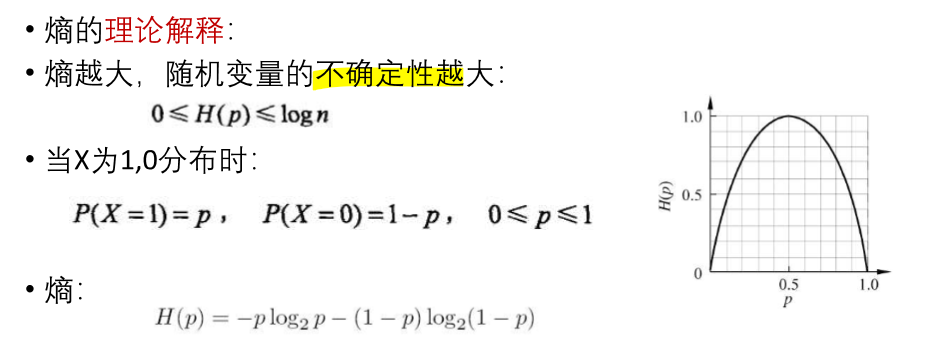
注意这里说的是离散随机变量，有分布列，取值有n种，简单推导知道了熵在p=1/n的情况下最大。那么方差是不是一样呢？暂时没找到说法。不过我感觉熵似乎更靠谱的地方在于它不会被随机变量具体取值的大小所影响。

注意这里还有个要点，就是如果p=0， $plog_2p$ 等于0，这是因为我们学过洛必达法则，$\lim_{p \to 0} \frac{\log p}{\frac{1}{p}} = \lim_{p \to 0} \frac{\frac{1}{p}}{-\frac{1}{p^2}} = \lim_{p \to 0} (-p) = 0$


这里我们复习一下什么是条件期望。我们知道什么叫做条件概率分布，条件期望就是条件概率采样下y取值的期望。
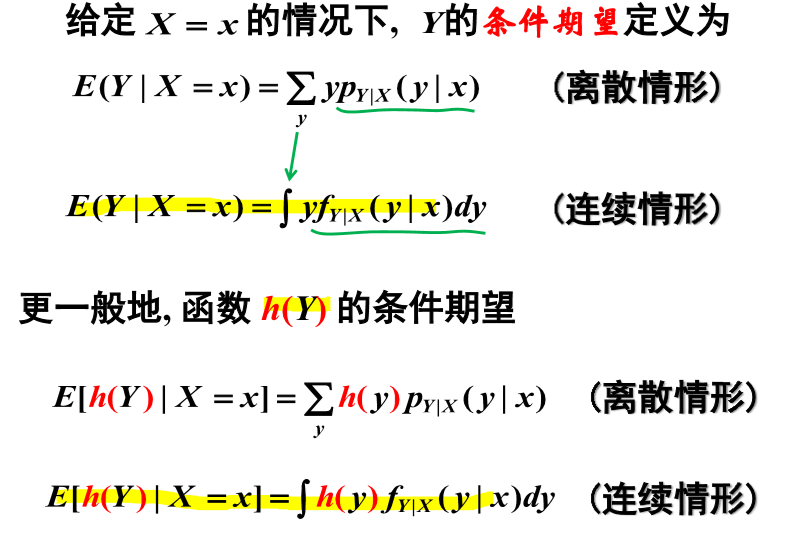
上面课件中最下面的公式意思是说如果相求h(y)的期望，并不需要求出h(y)的分布或者h(y)|x的分布。这是因为函数期望的基本定理（注意不是说期望的函数等于函数的期望，而是说函数的期望可以用原本的采样去计算）。

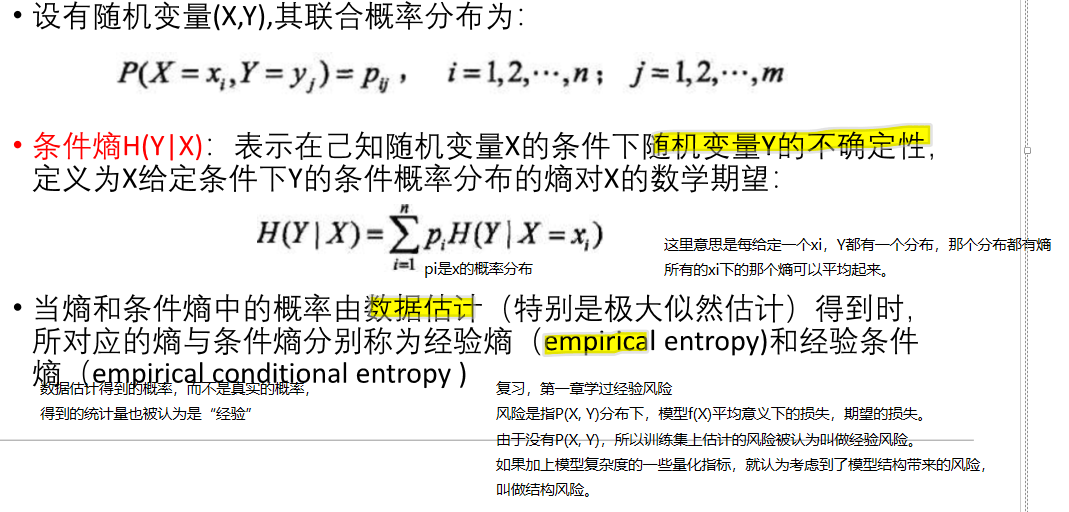
这里我们的问题是，这个定义看起来嵌套了一层，我们能不能直接通过条件期望去定义条件熵呢？
答案是不能。这里的符号我们需要特别注意，$H(Y|X) \neq H(Y|X=x)$，前者的X不知道，是个平均情况。

下一个概念是互信息。
李航书上提到，Y对X的互信息$I(Y; X) = H(Y) - H(Y|X)$是指得知X的取值让Y的不确定性减少，需要得知Y取值所需要的信息量减少了多少。
之所以叫做互相信息，是因为 $I(Y;X) = I (X; Y) $


##### PRML书上有什么补充吗？


##### 进一步的资料查找





#### 什么是最大熵？

最大熵就是给定某些限制条件下，允许我们修改一个随机变量的分布，使得其熵最大。问我们怎么修改。

这个问题其实需要分类讨论。核心结论是
- 离散随机变量均匀分布熵最大。
- 连续随机变量给定方差一定时，高斯分布的熵最大。

这里有几个问题
- 连续随机变量为什么均匀分布熵没有高斯分布大？
- 如果我们限定连续随机变量的取值范围为[a, b], 截断高斯分布(Truncated Gaussian Distribution)和均匀分布去比，哪个熵更大？

##### 具体怎么推导的？

对于离散型随机变量X，取值有N个，每个取值的概率是$p_i$，那么什么情况下X的熵最大呢？

$\max_{p_1,p_2,\cdots,p_N} H(X) = -\sum_{i=1}^N p_i \log_2 p_i \\ s.t. \sum_{i=1}^N p_i = 1$

求导
$\frac{dH_p(X)}{p_i} = - (1 \times \log_2 p_i + p_i \times \frac{1}{p_i}) = -( log_2 p_i + 1 ) = 0$ 似乎得到p_i=0，然而这个不满足约束条件。我们不能直接求导解决，要考虑约束。

应当使用拉格朗日乘子法，引入拉格朗日函数$
   L(p_1, p_2, ..., p_N, \lambda) = -(\sum_{i=1}^{N} p_i \log_2 p_i) + \lambda (\sum_{i=1}^{N} p_i - 1)
   $ 其中，$ \lambda $ 是拉格朗日乘子。

对每个变量 $ p_i $ 和 $ \lambda $ 求偏导数，并将它们设置为0以找到极值点。我们得到以下方程组：
   $
   \frac{\partial L}{\partial p_i} = -\log_2 p_i - 1 + \lambda = 0
   $

   $
   \frac{\partial L}{\partial \lambda} = \sum_{i=1}^{N} p_i - 1 = 0
   $

这里的重点是注意到第一个方程组，告诉我们每一个 $p_i$ 都是 $2^{-1+\lambda}$，都是同样的$\lambda$，所以是同一个数。第二个方程其实就还是约束条件，那么就简单了，$p_i = 1/N$。



#### 什么是最大熵原理？

最大熵原理是一个学习准则，认为学习概率模型应当选择熵最大的模型。
在什么东西里面选呢？还要先满足约束条件，也就是能在训练集上拟合，然后熵是在帮忙衡量模型的结构风险。

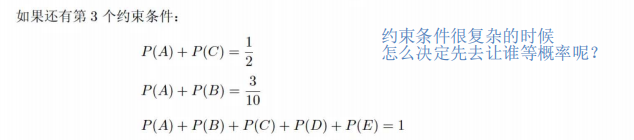
李航书上没有讨论具体求解约束的顺序。

这里我们再理解下书上的这个图
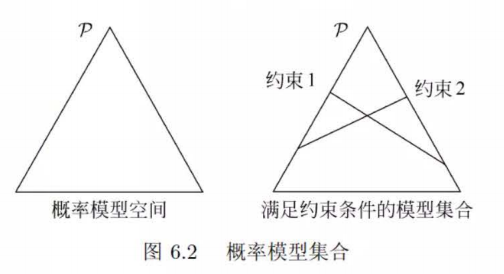
一个三角形表示了能取三个值的离散分布列。在顶点上表示这个顶点的那个值概率为1，其他两个取值为0，在边上表示对面的顶点取值是0。具体坐标是怎么对应到概率的呢？这个暂时没有搜索到答案。
为什么约束条件是直线不是曲线呢？图中的约束条件两条直线有唯一的交点，为什么李航仍然说这个模型还有无穷多个呢？



#### 什么是最大熵模型？
书上讲的很抽象，这里我的理解是，模型是指机器学习模型，也就是$P_w(Y|X)$, 机器学习训练集会给我们约束，限制$P_w(Y|X)$，然后我们使用最大熵原理去选择。

具体怎么约束是关键。李航书上介绍的方法是利用 $P(X, Y) = P(X) \times P(Y|X)$的性质，其中P(X, Y)和P(X)直接从数据集进行估计得到经验分布。
利用函数的期望的性质，进一步说要用期望相等来作为约束条件。
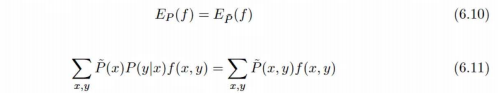

但是李航的书上讲到这里戛然而止，并没有说对于分类模型f要怎么定义。袁老师的课件上说对于NLP和CV是不同的，我仍然无法理解到底要干什么。

李航书上另一个疑点是X的分布他认为是连续型，但是这样估计出来的P(X, Y)和P(X)对吗？

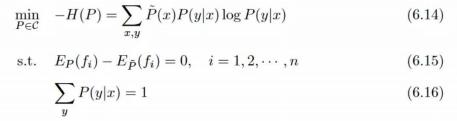


我们可以看到最后李航推到出来的东西
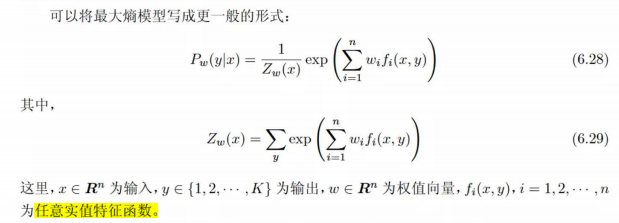
推理的时候，模型对于已知的x，试一下每一个不同的y，看看n个f(x, y)特征在w的组合下得到的值是多少，然后最后exp一下这个值，对所有试过的y做归一化。
这里我们终于看懂最大熵模型在搞什么了，前面推导时"f(x, y)"只能是两个值让我们不找到在干什么。
现在懂了，最大熵模型，如果$f(x, y)=x$，不去管y，就是softmax。


### 解题

#### 牛顿法和拟牛顿法

首先需要商榷一下课件上术语的表述。
- Number 1, 牛顿法=牛顿迭代法=Newton-Raphson Method， 这三个东西肯定一样的。但是梯度下降法有所区别。
- Number 2, 牛顿法分为两个，一个是用来解方程的（求根使得式子=0），一个是用来优化（求最小值）。这个很容易混淆，因为我们机器学习的时候，往往loss最小值就是0，搞得求根好像就是在优化一样。
- Number 3, 牛顿法解方程，迭代公式是 $x_{k+1} = x_k - \frac{f(x_k)}{f'(x_k)}$，其中 $f(x_k)$ 是函数值，$f'(x_k)$ 是函数的导数，这个是用切线去搞，不是叫做梯度下降法，梯度在下面，梯度下降法是用来优化的不是求根的。而牛顿法做优化，迭代公式才是 $x_{k+1} = x_k - \frac{f'(x_k)}{f''(x_k)}$， 这个反而和梯度下降法有关系，是对梯度下降法用二阶导数做了修正。
- 李航书上直接介绍了牛顿优化法的多维情况，也就是黑塞矩阵啦。
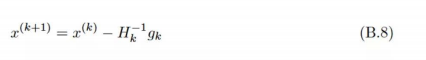
- 牛顿法解方程是利用一阶泰勒展开，局部用切线近似曲线，用切线的根代替曲线的根。牛顿法做优化则是利用二阶泰勒展开，局部用二次函数近似曲线，用二次函数的极值代替曲线的极值。


拟（quasi, /ˈkweɪzaɪ; ˈkweɪsaɪ; ˈkwɑːzi/, as it were）牛顿法想要替代掉 黑塞矩阵的逆矩阵 $H^{-1}$。
首先一阶导数的变化量可以用二阶导数乘上x的变化量来近似（二阶泰勒展开就是相等）
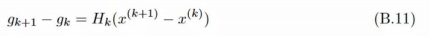
这个就是拟牛顿条件，就是说能充当$H_k^{-1}$的$G_k$, 
需要 $G_k (g_{k+1}-g_k) = (x_{k+1}-x_k) $

拟牛顿法需要通过迭代来计算$G_{k+1} = G_k + \Delta_k$，其中$\Delta_k$是拟牛顿条件的增量。

> 中间有一段感觉李航突然介绍了另一个东西，和拟牛顿法没关系，介绍了正定性说明牛顿法一定可以成功好奇怪。




#### DFP算法

DFP(Davidon-Fletcher-Powell)算法(DFP algorithm) 在李航528页附录B有描述，是求解无约束最优化问题的一种拟牛顿法。

假设 $\Delta_k = P_k + Q_k$，使用拟牛顿条件可以得到
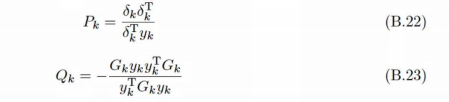

注意这里符号$y_k$实际上是$g_{k+1}-g_k$，不是原本那个y。

而初始的$G_k$ 要正定。

BGFS和DFP类似，只不过不是近似$G_k \approx H_k^{-1}$，而是近似$B_k \approx H_k$。


#### 最大熵模型拉格朗日乘子法化简

一开始我们最大熵的模型优化问题是

$$
\max_{P\in C} H(P) = -\sum_{x, y} \tilde{P}(x) P(y|x) \log P(y|x)\\
s.t. E_{P}(f_i) = E_{\tilde{P}}(f_i), i=1,2,...,n\\
\sum_{y} P(y|x) = 1, x\in X
$$

引入拉格朗日乘子w_{0:n}后，问题变成

$$
\min_{P\in C} \max_{w} L(P, w) \equiv -H(P) + w_0 (1-\sum_{y} P(y|x)) + \sum_{i=1}^n w_i (E_{P}(f_i) - E_{\tilde{P}}(f_i))
$$

注意这个式子的列法，我们产生疑问，求最大值和最小值有没有区别，是加上lambda还是减去lambda乘上约束条件？

首先注意拉格朗日乘子是大于等于0的，我们之所以可以按照上面的方法变换，在于外面想要最小化，而里面让约束条件不满足时有机会优化到正无穷（让违反约束的对应的拉格朗日乘子很大就行），所以里面是最小化。如果外面是要搞最大化，那里面就应该是最小化，或者变成减去拉格朗日乘子，让约束条件满足时有机会优化到负无穷。

对偶问题是反过来，在所有的拉格朗日乘子中搜索，其中任何一个x都有对应的最小的值，可能有时候偶尔违反下约束，得让那个东西小，最后搜索到x那么吝啬的小东西还要让它大。根据定理，这样对抗下来，其实拉格朗日乘子也不太敢把自己弄得很大，x会变得很小心翼翼，所以其实这个找到的最优值甚至比原始问题还要小。
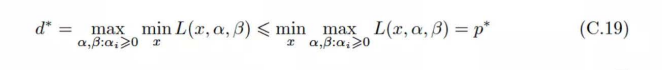


在满足KKT条件的时候，原始问题和对偶问题的最优解是等价的。最大熵模型就是满足了。

进一步求解偏导数=0之后，我们首先把P_w(y|x)的形式优化了出来。

$$
P_w(y|x) = softmax(\sum_{i=1}^n w_i f_i(x,y))
$$

所以我们最后的问题简化为拉格朗日乘子，这里实际上是模型参数，的最大化
$$
\max_{w} L(P, w) \equiv -H(P) + w_0 (1-\sum_{y} P_w(y|x)) + \sum_{i=1}^n w_i (E_{P}(f_i) - E_{\tilde{P}}(f_i))
$$

也就是
$$\min_{w\in R^n}\begin{aligned}
f(w)
&=\sum_x \hat P(x)\log \sum_y \exp \left( \sum_{i=1}^{n} w_i f_i(x,y)\right)-\sum_{x,y} \hat P(x,y)\sum_{i=1}^{n} w_i f_i(x,y)
\end{aligned},$$
梯度为
$$g(w)=\left(\frac{\partial f(w)}{\partial w_1}, \frac{\partial f(w)}{\partial w_2},...,\frac{\partial f(w)}{\partial w_n}\right)^T$$
其中,
$$\frac{\partial f(w)}{\partial w_i}=\sum_{x,y} \hat P(x)P_w(y|x)f_i(x,y)-E_{\hat P}(f_i),\quad i=1,2,...,n$$

#### DFP算法求解

输入为：特征函数 $ f_1,f_2,...,f_n$ ，经验分布 $\hat{P}(x,y)$ ，目标函数 $ f(w)$  ，梯度 $g(w)=\nabla f(w)$  ，精度要求 $\varepsilon $ 。

输出为：最优参数值 $ w^*$ ，最优模型 $ P_{w^*}(y|x)$ 。



算法步骤：

（1）选定初始点 $ w^{(0)}$ ，取 $ G_0$ 为正定对称矩阵，置 $ k=0$ ；

（2）计算 $ g_k=g{(w^{(k)})}$ ，若 $\left\|g_k\right\|<\varepsilon $ ，则认为精度到了，停止计算，得 $ w^*=w^{(k)}$，退出算法；

（3）由 $ p_k=-G_kg_k$  求出 $ p_k$， 这个 $ p_k$ 就是要更新的东西，近似的是 $-H_kg_k$


（4）一维搜索：求 $ \lambda _k$ 使得 $ f(w^{(k)}+\lambda_kp_k)=\min{\lambda≥0}f(w^{(k)}+\lambda p_k)$ ；这一步是为了更好的利用 $ p_k$ 


（5）置 $ w^{(k+1)}=w^{(k)}+\lambda_kp_k$ ；进行权重的实际更新

（6）计算 $ g_{k+1}=g(w^{(k+1)})$ ，若 $\left\|g_{k+1}\right\|<\varepsilon $ ，则停止计算，得 $ w^*=w^{(k+1)}$；否则，按下式求出 新的$ G_{k+1};$ 
$\begin{aligned}
&G_{k+1}=G_k+\frac{\delta_k\delta_k^T}{\delta_k^Ty_k}-\frac{G_ky_ky_k^TG_k}{y_k^TG_ky_k}
\end{aligned}$ 
其中，
$\begin{aligned}&y_k=g_{k+1}-g_k,&\delta_k=w^{(k+1)}-w^{(k)}\end{aligned}$ 

（7）置 $ k=k+1$ ，转步骤（3）。

#### Pytorch代码实现

最大熵实际上是怎么做多分类任务的呢？
我们尝试把上面的那些公式再用Pytorch实现一下。

由于我们还没有理解多分类任务的特征函数到底要怎么定义，所以我们这一部分的代码暂时先不写，等到理解了再补充。

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [ ]:

class XYFeatureExtractor(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(XYFeatureExtractor, self).__init__()
    def forward(self, x):
        # 这个是生成式模型，所以模型会自己脑补y，把所有情况的y都考虑一下
        return 1
        
# 定义最大熵模型（softmax分类器）
class MaxEntropyModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(MaxEntropyModel, self).__init__()
        self.fc = nn.Linear(input_dim*output_dim, output_dim)

    def forward(self, features):
        # 这里的x就是 batch个  f_{1:n}(x, y) 向量
        return torch.softmax(self.fc(features), dim=1)
    
class MaxEntropyLoss(nn.Module):
    def __init__(self, model:MaxEntropyModel, extractor : XYFeatureExtractor):
        super(MaxEntropyLoss, self).__init__()
        # 最大熵模型的损失函数和weight也有关系, 所以得传进来
        self.model = model 

    def forward(self, input, target):
        # print(input.shape)
        log_sum_exp = torch.logsumexp(self.model.fc(input), dim=1)
        # print(log_sum_exp.shape)
        sum_x_log_sum_exp = torch.sum(log_sum_exp) # empirical x
        sum_logits = torch.sum(self.model.fc(input), dim=1) 
        
        return -sum_x_log_sum_exp

In [ ]:
# model = MaxEntropyModel(100, 10) 
# criterion = MaxEntropyLoss(model)
# criterion(torch.randn(10, 100), torch.randint(0, 10, (10,)))

torch.Size([10, 100])
torch.Size([10])


tensor(-23.8446, grad_fn=<NegBackward0>)

我们很快观察到代码似乎都没用到target变量，到底怎么学习呢？

有待于进一步探究，我们会在后面的理论作业中尽可能搞懂这个问题，现在确实太抽象了，公式我是懂的，但是f(x, y)书上是真的没有写。需要调查一下资料，要不然我不知道Pytorch怎么实现最大熵模型。

我们倒是可以实现以下DFP算法先，这个看起来很好理解。

In [ ]:
# class DFP_optimizer(torch.optim.Optimizer):
class DFP_optimizer():
    def __init__(self, params):
        self.params = list(params)
        self.G = [torch.eye(p.size()[0]) for p in self.params]
        self.epsilon = 1e-5

    def step(self):
        for i, param in enumerate(self.params):
            g = param.grad
            G = self.G[i]
            pk = -torch.mv(G, g)
            # 一维搜索（这里简化为固定步长）
            lambda_k = 0.01
            param.data.add_(lambda_k, pk)
            gk_new = param.grad
            yk = gk_new - g
            dk = lambda_k * pk
            rho_k = 1.0 / torch.dot(yk, dk)
            # 更新G
            G = G - rho_k * torch.ger(torch.mv(G, yk), torch.mv(G, yk)) + rho_k * torch.ger(dk, dk)
            self.G[i] = G

In [ ]:
# Testing the DFP optimizer on a simple quadratic function
def quadratic_function(x):
    return (x - 3)**2

# Gradient of the quadratic function
def quadratic_gradient(x):
    return 2 * (x - 3)

# Initialize parameter
x = torch.tensor([0.0], requires_grad=True)
optimizer = DFP_optimizer([x])

# Optimization loop
for _ in range(20):
    # optimizer.zero_grad()
    x.grad = None
    loss = quadratic_function(x)
    loss.backward()
    optimizer.step()
    print(f'Current x: {x.item()}, Loss: {loss.item()}')

print(f'Optimized x: {x.item()}')

Current x: 0.05999999865889549, Loss: 9.0
Current x: nan, Loss: 8.643600463867188
Current x: nan, Loss: nan
Current x: nan, Loss: nan
Current x: nan, Loss: nan
Current x: nan, Loss: nan
Current x: nan, Loss: nan
Current x: nan, Loss: nan
Current x: nan, Loss: nan
Current x: nan, Loss: nan
Current x: nan, Loss: nan
Current x: nan, Loss: nan
Current x: nan, Loss: nan
Current x: nan, Loss: nan
Current x: nan, Loss: nan
Current x: nan, Loss: nan
Current x: nan, Loss: nan
Current x: nan, Loss: nan
Current x: nan, Loss: nan
Current x: nan, Loss: nan
Optimized x: nan


/tmp/ipykernel_2183857/2759460865.py:15: UserWarning: This overload of add_ is deprecated:
	add_(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add_(Tensor other, *, Number alpha) (Triggered internally at ../torch/csrc/utils/python_arg_parser.cpp:1578.)
  param.data.add_(lambda_k, pk)


看来我们的实现还有问题，要进一步优化一下，不过不是这次理论作业的重点，暂时先这样吧，去做科研了。

### 题目扩展问题



